In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
%%bash
git branch -v 

* emulate_z 3b0ac55 may have fixed EC. Still a few questions.
  master    564b960 Running another test, but switching for dev.


In [34]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [36]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z/'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [37]:
y_param = 'z'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233), ('z', 0.0)]
em_params = dict(emulation_point)
try:
    del em_params[y_param]
except KeyError:
    pass

In [38]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

In [39]:
y_param_idx = -1
for idx, p in enumerate(or_params):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [40]:
print em_params[y_param]

[ 0.          0.16666667  0.33333333  0.5       ]


In [41]:
print len(em_params)

7


In [42]:
emu1 = OriginalRecipe(training_dir,params=or_params)

In [43]:
emu1.x.shape

(17000, 8)

In [44]:
print len(or_params)

8


In [45]:
print em_params

{'logMmin': 12.233, 'f_c': 0.233, 'logM0': 12.0, 'sigma_logM': 0.533, 'logM1': 13.5, 'alpha': 1.083, 'z': array([ 0.        ,  0.16666667,  0.33333333,  0.5       ])}


In [46]:
rpoints = np.logspace(np.log10(rbins[1]), np.log10(rbins[-2]), 17)
log_xi_pred= emu1.emulate_wrt_r(em_params, rpoints)
log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
log_xi_err = np.sqrt(np.diag(log_xi_cov))
log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
log_xi_err = log_xi_err.reshape((-1, len(rpoints)))

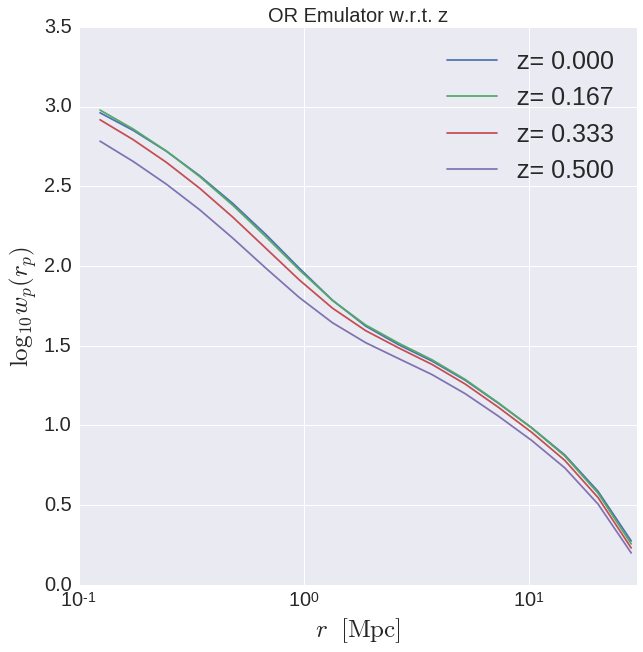

In [47]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [48]:
em_params

{'alpha': 1.083,
 'f_c': 0.233,
 'logM0': 12.0,
 'logM1': 13.5,
 'logMmin': 12.233,
 'sigma_logM': 0.533,
 'z': array([ 0.        ,  0.16666667,  0.33333333,  0.5       ])}

In [49]:
emu2 = ExtraCrispy(training_dir)#no r in params

In [50]:
rpoints = np.logspace(np.log10(emu2.scale_bin_centers[1]), np.log10(emu2.scale_bin_centers[-2]), 200)

In [51]:
8500/17

500

In [52]:
emu2.x.shape

(500, 6)

In [53]:
print emu2.emulators

[[<george.gp.GP object at 0x7f6aa7970ad0>, <george.gp.GP object at 0x7f6aa76dc350>, <george.gp.GP object at 0x7f6aa7650710>, <george.gp.GP object at 0x7f6aa578b050>, <george.gp.GP object at 0x7f6aa79ef510>, <george.gp.GP object at 0x7f6aa79ef3d0>, <george.gp.GP object at 0x7f6aa79ef8d0>, <george.gp.GP object at 0x7f6aa79efd50>, <george.gp.GP object at 0x7f6aa57920d0>, <george.gp.GP object at 0x7f6aa5792250>, <george.gp.GP object at 0x7f6aa57923d0>, <george.gp.GP object at 0x7f6aa5792550>, <george.gp.GP object at 0x7f6aa57926d0>, <george.gp.GP object at 0x7f6aa5792850>, <george.gp.GP object at 0x7f6aa57929d0>, <george.gp.GP object at 0x7f6aa5792b50>, <george.gp.GP object at 0x7f6aa5792cd0>], [<george.gp.GP object at 0x7f6aa7a0c550>, <george.gp.GP object at 0x7f6aa7650590>, <george.gp.GP object at 0x7f6aa79ec890>, <george.gp.GP object at 0x7f6aa79efe90>, <george.gp.GP object at 0x7f6aa79ef9d0>, <george.gp.GP object at 0x7f6aa79efbd0>, <george.gp.GP object at 0x7f6aa79ef490>, <george.gp.G

In [54]:
print em_params.keys()

['logMmin', 'f_c', 'logM0', 'sigma_logM', 'logM1', 'alpha', 'z']


In [55]:
log_xi_pred = emu2.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

(1, 17, 2)
(34,)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print log_xi_pred.shape
print emu2.redshift_bin_centers.shape
print emu2.scale_bin_centers.shape

In [ ]:
from scipy.interpolate import interp2d

In [ ]:
xi_interpolator = interp2d(emu2.scale_bin_centers, emu2.redshift_bin_centers, log_xi_pred, kind='linear')

In [ ]:
interp_mean = xi_interpolator(np.logspace(np.log10(emu2.scale_bin_centers[1]), np.log10(emu2.scale_bin_centers[-2]), 200),
                             np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4))

In [ ]:
print interp_mean.shape
log_xi_pred = interp_mean

In [ ]:
print emu2.y.shape
print len(emu2.emulators), len(emu2.emulators[0])
print emu2.y_hat.shape

In [ ]:
print log_xi_pred.shape

In [ ]:
print log_xi_pred.T[:2, :2]

In [ ]:
rpoints = np.logspace(np.log10(emu2.scale_bin_centers[1]), np.log10(emu2.scale_bin_centers[-2]), 200)

In [ ]:
log_xi_err = np.zeros(log_xi_pred.shape)

In [ ]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [ ]:
from os import path

In [ ]:
save_dir = '/u/ki/swmclau2/des/EmulatorMCMC/'
true_rpoints = np.log10(np.loadtxt(path.join(save_dir, 'rpoints.npy')))
y = np.loadtxt(path.join(save_dir, 'xi.npy'))
cov = np.loadtxt(path.join(save_dir, 'cov.npy'))
true_cov = cov/(np.outer(y,y)*np.log(10)**2)
#T = np.diag(np.diag(T))
true_y = np.log10(y)

In [ ]:
import emcee as mc
from itertools import izip
nwalkers = 100
n_cores = 2
nsteps = 10
nburn = 1

In [ ]:
from pearce.emulator.emu import lnprob as lnprob2